# Oil Futures

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\nospm\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### Read in data

In [2]:
df = pd.read_csv(
    Path("./data/oil_futures.csv"), parse_dates=True, index_col="Date"
)

df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return
Date,,,,,,,,,
2014-02-20,100.78,100.78,100.78,100.78,0.05,100.78,15.0,12833.0,0.318376
2014-02-21,100.61,100.61,100.61,100.61,0.17,100.61,0.0,12833.0,-0.049588
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0,-0.168684
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,0.159030
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.198472


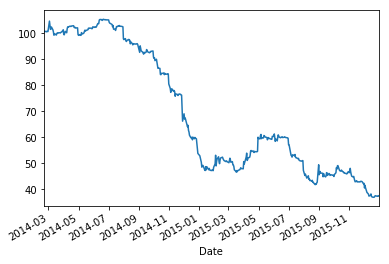

In [3]:
# More on settle prices: https://www.investopedia.com/terms/s/settlementprice.asp
df.Settle.plot()

### Calculate returns

In [6]:
returns_df = df[['Settle']].pct_change()
returns_df.head()

,Settle
Date,
2014-02-20,NaN
2014-02-21,-0.001687
2014-02-24,0.001590
2014-02-25,-0.001985
2014-02-26,0.001193


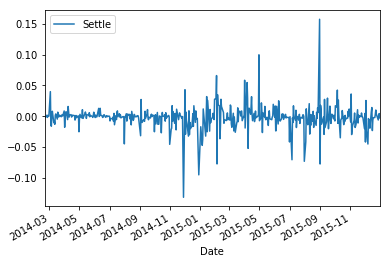

In [7]:
# Create a column of the settle price returns
returns_df.plot()

In [8]:
# Add columns of returns and lagged returns to the data frame
# The lagged returns are created to associate a date with its returns
df['Return'] = returns_df['Settle']
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return,Return
Date,,,,,,,,,,
2014-02-20,100.78,100.78,100.78,100.78,0.05,100.78,15.0,12833.0,0.318376,NaN
2014-02-21,100.61,100.61,100.61,100.61,0.17,100.61,0.0,12833.0,-0.049588,-0.001687
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0,-0.168684,0.001590
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,0.159030,-0.001985
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.198472,0.001193


In [5]:
# Add columns of returns and lagged returns to the data frame
# The lagged returns are created to associate a date with its returns
# YOUR CODE HERE!

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return,Return
Date,,,,,,,,,,
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0,-0.168684,0.159030
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,0.159030,-0.198472
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.198472,0.119320
2014-02-27,100.67,100.67,100.67,100.67,0.02,100.67,0.0,12776.0,0.119320,-0.019863
2014-02-28,100.68,100.68,100.68,100.68,0.01,100.68,0.0,12776.0,-0.019863,0.009933


# Prepapre the Features (X) and the Target (y)

In [16]:
# Set the Dependent variable y to the `Return`
y = df['Return']
y.head()

Date
2014-02-20         NaN
2014-02-21   -0.001687
2014-02-24    0.001590
2014-02-25   -0.001985
2014-02-26    0.001193
Name: Return, dtype: float64

In [17]:
x = df[['Lagged_Return']]
x.head()

,Lagged_Return
Date,
2014-02-20,0.318376
2014-02-21,-0.049588
2014-02-24,-0.168684
2014-02-25,0.159030
2014-02-26,-0.198472


In [18]:
x['Week_of_year'] = x.index.weekofyear
x.head()

,Lagged_Return,Week_of_year
Date,,
2014-02-20,0.318376,8
2014-02-21,-0.049588,8
2014-02-24,-0.168684,9
2014-02-25,0.159030,9
2014-02-26,-0.198472,9


### Get dummy variables for week and year

In [19]:
# Get a dummy variable for each week of the year
X_binary_encoded = pd.get_dummies(x, columns=['Week_of_year'])
X_binary_encoded.head()

,Lagged_Return,Week_of_year_1,Week_of_year_2,Week_of_year_3,Week_of_year_4,Week_of_year_5,Week_of_year_6,Week_of_year_7,Week_of_year_8,Week_of_year_9,...,Week_of_year_44,Week_of_year_45,Week_of_year_46,Week_of_year_47,Week_of_year_48,Week_of_year_49,Week_of_year_50,Week_of_year_51,Week_of_year_52,Week_of_year_53
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-20,0.318376,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2014-02-21,-0.049588,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2014-02-24,-0.168684,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-25,0.159030,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-26,-0.198472,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_binary_encoded.shape

(463, 54)

### Linear Regresion model

In [11]:
# Create a Linear Regression model and fit it to the data
# YOUR CODE HERE!

In [12]:
# Create predictions using the trained model and the `X_binary_encoded` data
# YOUR CODE HERE!

# List the first 10 predictions
# YOUR CODE HERE!

array([-0.09408009, -0.19278838, -0.08510803, -0.18082762, -0.13890543,
        0.22904997, -0.96762181,  0.66360517,  0.72241888,  0.19940254])

# Evaluating the Model

Evaluate the model using r2, mse, rmse

Compare the rmse to the standard deviation.

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate r2_score (r-squared)
# YOUR CODE HERE!

r2: 0.20040272358975775


In [12]:
# Calculate mean squared error 
# Remember, a "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.
# YOUR CODE HERE!

In [13]:
# Using mean squared error above, calculate root-mean-squared error (RMSE)
# YOUR CODE HERE!

In [14]:
# Print the r2, mser, rmse, and standard deviation
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Futures Return: {np.std(y)}")

R-squared (R2 ): 0.20040272358975775
Mean Squared Error (MSE): 2.9861924939839137
Root Mean Squared Error (RMSE): 1.7280603270672912
Standard Deviation of Futures Return: 1.9325166602824382
